[2017-07-31 23:49:19,588] Making new env: FrozenLake-v0
[2017-07-31 23:49:19,594] Clearing 22 monitor files from previous run (because force=True was provided)
[2017-07-31 23:49:19,604] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000000.json
[2017-07-31 23:49:19,611] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000001.json
[2017-07-31 23:49:19,619] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000008.json
[2017-07-31 23:49:19,631] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000027.json
[2017-07-31 23:49:19,647] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000064.json
[2017-07-31 23:49:19,670] Starting new video recorder writing to C:\tmp\FrozenLake-experiment-6\openaigym.video.1.9756.video000125.json
[2017-07-31 23:49:19,713

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


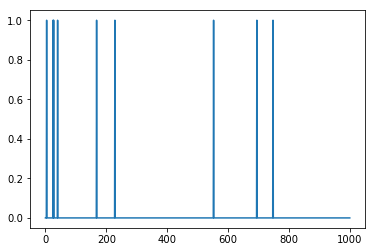

In [5]:
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers

num_episodes = 1000

def run_episode(env,Q,learning_rate,discount,episode,render=False):
    observation = env.reset()
    done = False
    t_reward = 0
    max_steps = env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')
    for i in xrange(max_steps):
        if done:
            break
        if render:
            env.render()

        curr_state = observation

        action = np.argmax(Q[curr_state,:]  + np.random.randn(1, env.action_space.n)*(1./(episode+1)))

        observation, reward, done, info = env.step(action)

        t_reward += reward

        #Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]

    return Q, t_reward

def train():
    env = gym.make('FrozenLake-v0')
    env = wrappers.Monitor(env, '/tmp/FrozenLake-experiment-6',force=True)
    learning_rate = 0.81
    discount = 0.96

    reward_per_ep = list()
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for i in xrange(num_episodes):
        Q,reward = run_episode(env,Q,learning_rate,discount,i)
        reward_per_ep.append(reward)
        #print "----------Next Episode---------"
        #print i
    plt.plot(reward_per_ep)
    
    return Q

q = train()
print q

In [4]:
env = gym.make('FrozenLake-v0')
s = env.reset()
d=False
while d==False:
    a = np.argmax(q[s,:])
    s,r,d,x = env.step(a)
    print("%s %s %s %s"%(s,r,d,x))
    env.render()

[2017-07-31 23:47:32,582] Making new env: FrozenLake-v0


0 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
8 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Up)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 0.3333333333333333}
  (Left)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0